# <b><span style='color:#F1A424'>AutoFraud - Online Payment Fraud Detection</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>

**Dataset used - Online Payment Fraud Dataset**

**Features**:

- `step`: Represents a unit of time where 1 step equals 1 hour.
- `type`: Type of Transaction.
- `amount`: Transaction Amount.
- `nameOrig`: Customer starting the Transaction.
- `oldbalanceOrg`: Balance before the Transaction.
- `newbalanceOrg`: Balance after the Transaction.
- `nameDest`: Recipient of Transaction
- `oldbalanceDest`: Balance of Recipient before Transaction
- `newbalanceDest`: Balance of Recipient after Transaction


**Target Variable**:

- `isFraud`: Binary variable indicating whether the transaction is Fraud (1) or not (0).

        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict whether a Transaction is fraud based on the available features.
                                 
**Usecase**:

- Here, we will use AutoFraud(Automated Fraud Detection) functionality to automate the entire process of developing a predictive model. 
- It will perform `feature exploration`, `feature engineering`, `data preparation`, `model training` and `model evaluation` on dataset in auto run and at end we will get `leaderboard` containined different models along with their performance. 
- Model will also have `rank` associated with them which indicates which is `best performing model` for given data followed by other models.

In [1]:
from teradataml import AutoML, AutoFraud

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit
from teradataml import copy_to_sql

In [4]:
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [5]:
load_example_data("teradataml", ["payment_fraud_dataset"])

In [6]:
fraud_df= DataFrame.from_table("payment_fraud_dataset")

In [7]:
fraud_df.shape

(10000, 10)

In [8]:
fraud_df.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1,CASH_OUT,14750.26,C1098568947,None,7239.33,C1899073220,1096233.87,420946.86,0
1,PAYMENT,12728.46,C749443480,83636.0,70907.54,M796553753,0.0,0.0,0
1,PAYMENT,5033.02,C1057307776,23946.7,18913.68,M1819038759,0.0,0.0,0
1,CASH_OUT,127143.23,C1225927567,0.0,0.0,C1899073220,587422.29,877201.48,0
1,PAYMENT,7577.43,C1166361824,0.0,0.0,M1808527451,0.0,0.0,0
1,CASH_IN,56869.53,C1753259207,1020491.31,1077360.84,C1568059495,179620.02,122750.49,0
1,CASH_IN,349505.89,C173791568,7330235.59,7679741.48,C1590550415,17000000.0,19200000.0,0
1,CASH_OUT,156819.6,C503595296,0.0,0.0,C1318822808,438635.96,500631.71,0
1,PAYMENT,2266.02,C224060798,None,62491.91,M1752535057,0.0,0.0,0
1,TRANSFER,373610.77,C2012095985,17159.94,0.0,C884457408,38202.14,502480.02,0


In [9]:
fraud_df_sample = fraud_df.sample(frac = [0.8, 0.2])

In [10]:
fraud_df_sample.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,sampleid
1,TRANSFER,373610.77,C2012095985,17159.94,0.0,C884457408,38202.14,502480.02,0,1
1,TRANSFER,347391.16,C902654164,45584.0,0.0,C801142660,13993.0,637928.74,0,1
1,CASH_IN,56869.53,C1753259207,1020491.31,1077360.84,C1568059495,179620.02,122750.49,0,1
1,PAYMENT,8148.08,C1413886135,None,0.0,M1693997031,0.0,0.0,0,2
1,CASH_IN,27363.26,C574746715,2311674.95,2339038.21,C1590550415,19200000.0,18100000.0,0,1
1,CASH_IN,67200.07,C1448277333,108912.0,176112.07,C243745864,0.0,0.0,0,1
1,CASH_OUT,156819.6,C503595296,0.0,0.0,C1318822808,438635.96,500631.71,0,1
1,PAYMENT,5033.02,C1057307776,23946.7,18913.68,M1819038759,0.0,0.0,0,1
1,PAYMENT,None,C438123546,5578.0,4521.36,M29774113,0.0,0.0,0,1
1,PAYMENT,9805.46,C480184864,0.0,0.0,M1433956626,0.0,0.0,0,1


In [11]:
fraud_df_train= fraud_df_sample[fraud_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
fraud_df_test = fraud_df_sample[fraud_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
fraud_df_test.shape

(2000, 10)

In [13]:
fraud_df_train.shape

(8000, 10)

In [14]:
fraud_df_train.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1,CASH_IN,67200.07,C1448277333,108912.0,176112.07,C243745864,0.0,0.0,0
1,CASH_IN,56869.53,C1753259207,1020491.31,1077360.84,C1568059495,179620.02,122750.49,0
1,PAYMENT,9805.46,C480184864,0.0,0.0,M1433956626,0.0,0.0,0
1,CASH_OUT,127143.23,C1225927567,0.0,0.0,C1899073220,587422.29,877201.48,0
1,PAYMENT,3193.99,C1443173326,29992.0,26798.01,M318794136,0.0,0.0,0
1,PAYMENT,1068.45,C1752365512,11411.0,10342.55,M1831705084,0.0,0.0,0
1,CASH_OUT,None,C1635772897,35063.63,0.0,C1983025922,31140.0,7550.03,1
1,TRANSFER,347391.16,C902654164,45584.0,0.0,C801142660,13993.0,637928.74,0
1,CASH_IN,27363.26,C574746715,2311674.95,2339038.21,C1590550415,19200000.0,18100000.0,0
1,TRANSFER,373610.77,C2012095985,17159.94,0.0,C884457408,38202.14,502480.02,0


In [15]:
fraud_df_test.head()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,PAYMENT,4090.83,C880282841,0.0,0.0,M1648278215,0.0,0.0,0
2,PAYMENT,12894.97,C904872862,20527.0,7632.03,M1234654510,0.0,0.0,0
3,PAYMENT,4158.69,C698062929,24366.0,20207.31,M421135185,0.0,0.0,0
4,TRANSFER,170889.82,C1478269879,31431.0,0.0,C1359953204,0.0,63011.84,0
5,CASH_IN,None,C1776483899,224882.89,330964.89,C451111351,3784384.15,3678302.15,0
5,CASH_OUT,120074.73,C1174000532,120074.73,0.0,C410033330,0.0,120074.73,1
4,CASH_IN,196821.07,C1590292218,1728770.3,1925591.38,C1711105800,200343.97,3522.9,0
2,TRANSFER,None,C162214155,0.0,None,C1916720513,6007666.57,6235766.54,0
1,PAYMENT,2266.02,C224060798,None,62491.91,M1752535057,0.0,0.0,0
1,PAYMENT,8148.08,C1413886135,None,0.0,M1693997031,0.0,0.0,0


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoFraud </b>

In [15]:
help(AutoFraud)

Help on class AutoFraud in module teradataml.automl:

class AutoFraud(AutoML)
 |  AutoFraud(include=None, exclude=None, verbose=0, max_runtime_secs=None, stopping_metric=None, stopping_tolerance=None, max_models=None, custom_config_file=None, **kwargs)
 |
 |  Method resolution order:
 |      AutoFraud
 |      AutoML
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, include=None, exclude=None, verbose=0, max_runtime_secs=None, stopping_metric=None, stopping_tolerance=None, max_models=None, custom_config_file=None, **kwargs)
 |      DESCRIPTION:
 |          AutoFraud is a dedicated AutoML pipeline designed specifically for fraud detection
 |          tasks. It automates the process of building, training, and evaluating models
 |          tailored to identify fraudulent activities, streamlining the workflow for
 |          fraud detection use cases.
 |
 |      PARAMETERS:
 |          include:
 |              Optional Argument.
 |              Specifies the model a

In [16]:
help(AutoML)

Help on class AutoML in module teradataml.automl:

class AutoML(builtins.object)
 |  AutoML(task_type='Default', include=None, exclude=None, verbose=0, max_runtime_secs=None, stopping_metric=None, stopping_tolerance=None, max_models=None, custom_config_file=None, is_fraud=False, is_churn=False, **kwargs)
 |
 |  Methods defined here:
 |
 |  __init__(self, task_type='Default', include=None, exclude=None, verbose=0, max_runtime_secs=None, stopping_metric=None, stopping_tolerance=None, max_models=None, custom_config_file=None, is_fraud=False, is_churn=False, **kwargs)
 |      DESCRIPTION:
 |          AutoML (Automated Machine Learning) is an approach that automates the process
 |          of building, training, and validating machine learning models. It involves
 |          various algorithms to automate various aspects of the machine learning workflow,
 |          such as data preparation, feature engineering, model selection, hyperparameter
 |          tuning, and model deployment. It ai

OR

In [16]:
fd2 = AutoFraud(verbose=2,
                stopping_metric="MACRO-F1",
                stopping_tolerance=0.7,
                max_runtime_secs=100)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8000
Total Columns in the data: 10

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
isFraud,BIGINT,8000,0,None,7843,157,0,0.0,100.0
nameDest,VARCHAR(1024) CHARACTER SET UNICODE,8000,0,0,None,None,None,0.0,100.0
type,VARCHAR(1024) CHARACTER SET UNICODE,8000,0,0,None,None,None,0.0,100.0
amount,FLOAT,7207,793,None,0,7207,0,9.9125,90.0875
newbalanceOrig,FLOAT,7186,814,None,4070,3116,0,10.175,89.825
newbalanceDest,FLOAT,8000,0,None,3130,4870,0,0.0,100.0
nameOrig,VARCHAR(1024) CHARACTER SET UNICODE,8000,0,0,None,None,None,0.0,100.0
step,BIGINT,8000,0,None,0,8000,0,0.0,100.0
oldbalanceDest,FLOAT,8000,0,None,3386,4614,0,0.0,100.0
oldbalanceOrg,FLOAT,7212,788,None,2354,4858,0,9.85,90.15



Statistics of Data:


func,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
min,1,1.27,0,0,0,0,0
std,16.279,377144.683,2865458.126,2929635.24,2306631.712,2426844.972,0.139
25%,14.75,12379.265,0,0,0,0,0
50%,20,80390.77,17517.935,0,109057.93,208772.415,0
75%,40,220899.84,144276.25,160472.698,894138.74,1132481.155,0
max,95,9887819.06,29200000,29300000,34200000,34400000,1
mean,27.272,175974.963,854417.56,876310.923,961214.718,1101846.405,0.02
count,8000,7207,7212,7186,8000,8000,8000



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
type                      5         
nameOrig                  8000      
nameDest                  7742      

Futile columns in dataset:


ColumnName
nameDest
nameOrig



Target Column Distribution:


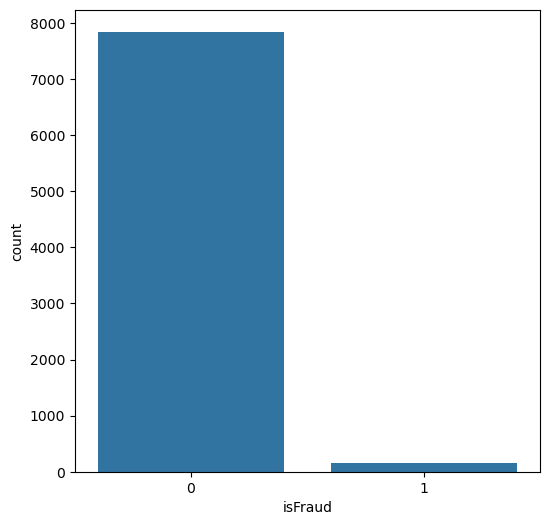

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
       ColumnName  OutlierPercentage
0  newbalanceOrig            11.0625
1            step             1.1125
2  oldbalanceDest             0.9875
3  newbalanceDest             1.0000
4   oldbalanceOrg            10.7500
5          amount            11.7125


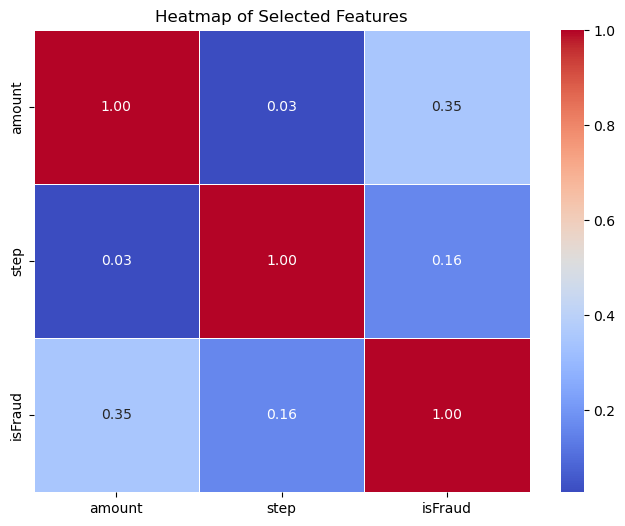


 Number of features selected for Boxplots: 2

Selection Criteria: Features above threshold correlation

Selected Features: amount, step

Feature Distributions by Target Column (Boxplots):


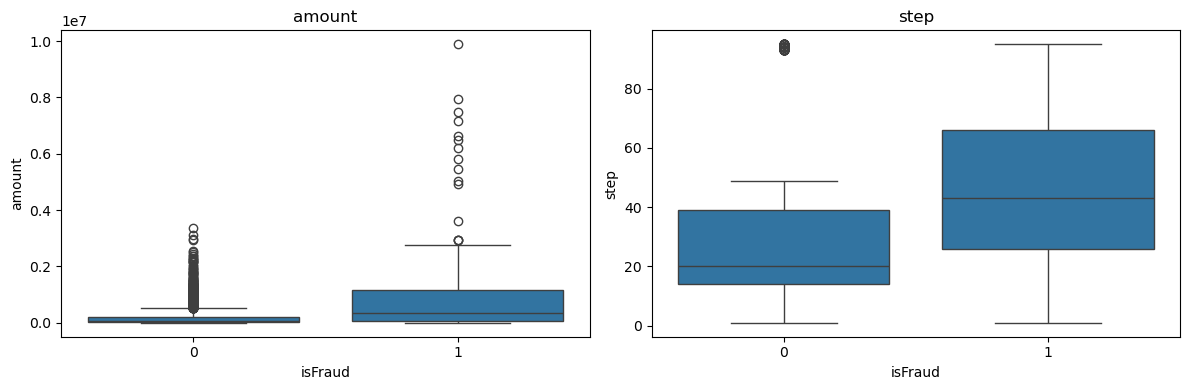


Categorical Feature Distributions by Target Column (Count Plots):


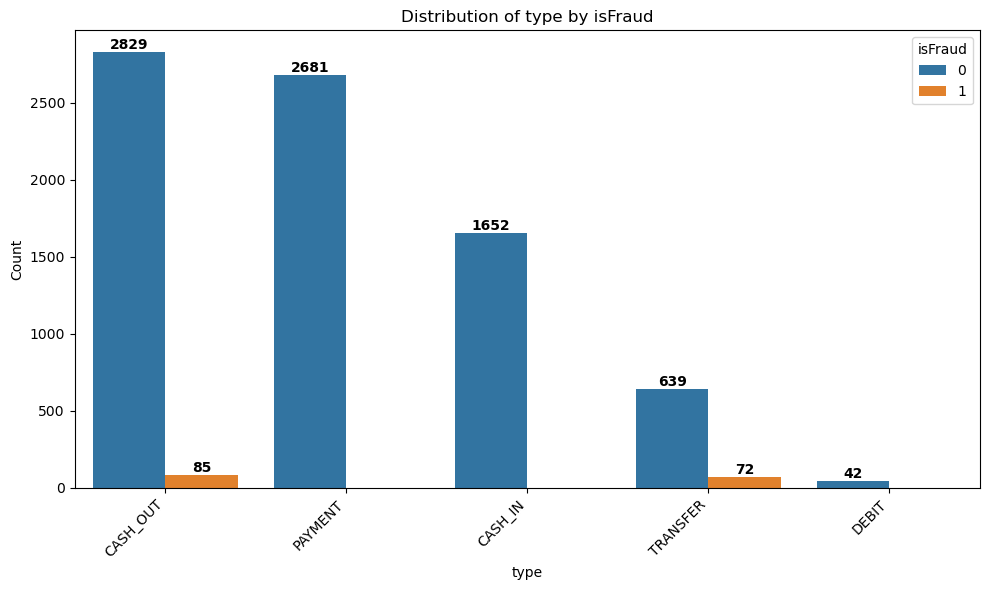

Analysis completed. No action taken.                                                    


['nameOrig', 'nameDest']


step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,id
36,PAYMENT,6035.75,202473.0,196437.25,0.0,0.0,0,15
41,CASH_OUT,102084.01,52322.0,0.0,1416678.07,1766509.19,0,8
18,CASH_OUT,465934.69,4429.0,0.0,20951.0,887778.51,0,12
40,PAYMENT,580.56,0.0,0.0,0.0,0.0,0,6
40,TRANSFER,3827.44,0.0,0.0,264124.61,267952.05,0,14
11,CASH_OUT,268743.47,121004.0,0.0,88430.45,357173.92,0,5
65,CASH_OUT,403975.39,403975.39,0.0,0.0,403975.39,1,9
34,CASH_OUT,140193.34,None,0.0,613993.09,754186.43,0,13
40,TRANSFER,259837.26,0.0,0.0,639889.76,899727.03,0,10
8,PAYMENT,20996.68,0.0,0.0,0.0,0.0,0,4


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


amount: 793
oldbalanceOrg: 788
newbalanceOrig: 814


['amount', 'oldbalanceOrg', 'newbalanceOrig']


amount: median
oldbalanceOrg: median
newbalanceOrig: median
['amount', 'oldbalanceOrg', 'newbalanceOrig']⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 22% - 4/18
['median', 'median', 'median']


step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,id
40,PAYMENT,9666.62,49888.0,40221.38,0.0,0.0,0,26
40,PAYMENT,21271.23,0.0,0.0,0.0,0.0,0,38
40,PAYMENT,13087.91,0.0,0.0,0.0,0.0,0,42
40,CASH_OUT,110739.2,0.0,0.0,4859078.33,4712825.23,0,46
40,PAYMENT,7948.52,0.0,0.0,0.0,0.0,0,54
40,CASH_OUT,107058.9,16040.0,0.0,3940984.37,4048043.26,0,58
18,TRANSFER,9131.0,9131.0,0.0,0.0,0.0,1,416
56,TRANSFER,136562.78,136562.78,0.0,0.0,0.0,1,652
61,CASH_OUT,1155128.91,1155128.91,0.0,0.0,1155128.91,1,760
78,CASH_OUT,113829.89,113829.89,0.0,0.0,113829.89,1,860


['type']


type,oldbalanceDest,newbalanceDest,id,isFraud,newbalanceOrig,step,oldbalanceOrg,amount
7.317300521998509e-06,0.0,0.0,63,0,9426.8,15,11198.0,1771.2
7.317300521998509e-06,0.0,0.0,107,0,0.0,45,0.0,459.65
7.317300521998509e-06,0.0,0.0,143,0,59656.06,15,75678.0,16021.94
7.317300521998509e-06,0.0,0.0,6,0,0.0,40,0.0,580.56
7.317300521998509e-06,0.0,0.0,26,0,40221.38,40,49888.0,9666.62
7.317300521998509e-06,0.0,0.0,38,0,0.0,40,0.0,21271.23
7.317300521998509e-06,0.0,0.0,18,0,0.0,40,14541.0,33275.55
7.317300521998509e-06,0.0,0.0,79,0,0.0,14,0.0,25568.95
7.317300521998509e-06,0.0,0.0,47,0,38967.27,15,56699.91,17732.63
7.317300521998509e-06,0.0,0.0,39,0,0.0,36,5981.0,11387.1


Rounding columns｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 33% - 6/18
        id  isFraud    type  oldbalanceDest  newbalanceDest  newbalanceOrig  oldbalanceOrg     amount
step                                                                                                 
17    2933        0  0.0000            0.00            0.00       261848.45      273634.00   11785.55
17    3141        0  0.0292       429403.13       409717.28            0.00       16040.00   29374.40
17     373        0  0.0000            0.00            0.00       215934.47      230320.36   14385.89
17     721        0  0.0000            0.00            0.00            0.00           0.00   17096.02
17     981        0  0.0000       189090.00       200067.43       868331.96      862872.68    5459.28
17    2441        0  0.0292      1201251.91      1360681.50            0.00           0.00  159429.59
17    1353        0  0.0292         7692.72       219357.88       516219.85      727885.00  21

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
       ColumnName  OutlierPercentage
0              id             1.9875
1          amount             1.9875
2            step             1.1125
3   oldbalanceOrg             1.0000
4  newbalanceOrig             1.0000
5  newbalanceDest             1.0000
6  oldbalanceDest             0.9875


['oldbalanceDest', 'oldbalanceOrg', 'step', 'newbalanceDest', 'id', 'newbalanceOrig', 'amount']


type,oldbalanceDest,newbalanceDest,id,isFraud,newbalanceOrig,step,oldbalanceOrg,amount
0.10115115870786517,0.0,0.0,3561,1,0.0,20,114017.19,114017.19
0.10115115870786517,0.0,0.0,5841,1,0.0,34,1462355.44,77516.17499999999
0.10115115870786517,0.0,0.0,6613,1,0.0,20,37796.75,37796.75
0.10115115870786517,0.0,0.0,4003,1,0.0,20,106673.26,106673.26
0.10115115870786517,0.0,746575.95,1904,1,0.0,18,1102133.9,77516.17499999999
0.10115115870786517,0.0,0.0,2004,1,0.0,25,44829.81,44829.81
0.10115115870786517,0.0,0.0,652,1,0.0,20,136562.78,136562.78
0.10115115870786517,0.0,0.0,4697,1,0.0,34,989311.12,77516.17499999999
0.10115115870786517,0.0,0.0,3425,1,0.0,9,244068.01,244068.01
0.10115115870786517,0.0,0.0,2017,1,0.0,33,214975.9,214975.9


['oldbalanceDest', 'newbalanceDest', 'newbalanceOrig', 'step', 'oldbalanceOrg', 'amount', 'type']


['oldbalanceDest', 'newbalanceDest', 'newbalanceOrig', 'step', 'oldbalanceOrg', 'amount', 'type']


id,isFraud,oldbalanceDest,newbalanceDest,newbalanceOrig,step,oldbalanceOrg,amount,type
2,0,0.0,0.0,0.006870387713310579,0.4148936170212766,0.0071757667808219185,0.000832211937432961,0.0
4,1,0.0,0.0,0.0,0.6382978723404256,0.0012918147260273971,0.003814766898126669,1.0
5,0,0.0,0.0,0.0026678044368600683,0.1702127659574468,0.0031311989726027396,0.0013413546124821944,0.0
6,0,0.05607131637426901,0.06628411947674419,0.05481392559726962,0.4148936170212766,0.04879878493150685,0.01831771517707144,0.0
8,1,0.0,0.033579328779069766,0.0,0.6382978723404256,0.03955920924657534,0.11682331375161797,0.2885375494071146
9,0,0.0,0.0,0.008936807167235496,0.1702127659574468,0.009371027397260274,0.001191797851687556,0.0
7,0,0.0,0.0018282098837209301,0.0,0.19148936170212766,0.001846917808219178,0.00636026586812741,0.2885375494071146
3,0,0.17887189824561403,0.17958990058139535,0.003177818771331058,0.19148936170212766,0.005259717465753424,0.0061158479337228965,0.2885375494071146
1,0,1.023391812865497e-05,0.003619282558139535,0.0,0.1702127659574468,0.001316541095890411,0.012556061674757054,0.2885375494071146
0,1,0.0,0.0,0.0,0.6382978723404256,0.0113746,0.033590531000268355,1.0


['step', 'type', 'oldbalanceDest', 'newbalanceDest', 'newbalanceOrig', 'oldbalanceOrg', 'amount']


['r_step', 'r_type', 'r_oldbalanceDest', 'r_newbalanceDest', 'r_newbalanceOrig', 'r_oldbalanceOrg', 'r_amount']


id,isFraud,r_step,r_type,r_oldbalanceDest,r_newbalanceDest,r_newbalanceOrig,r_oldbalanceOrg,r_amount
2,0,0.4148936170212766,0.0,0.0,0.0,0.006870387713310579,0.0071757667808219185,0.000832211937432961
4,1,0.6382978723404256,1.0,0.0,0.0,0.0,0.0012918147260273971,0.003814766898126669
5,0,0.1702127659574468,0.0,0.0,0.0,0.0026678044368600683,0.0031311989726027396,0.0013413546124821944
6,0,0.4148936170212766,0.0,0.05607131637426901,0.06628411947674419,0.05481392559726962,0.04879878493150685,0.01831771517707144
8,1,0.6382978723404256,0.2885375494071146,0.0,0.033579328779069766,0.0,0.03955920924657534,0.11682331375161797
9,0,0.1702127659574468,0.0,0.0,0.0,0.008936807167235496,0.009371027397260274,0.001191797851687556
7,0,0.19148936170212766,0.2885375494071146,0.0,0.0018282098837209301,0.0,0.001846917808219178,0.00636026586812741
3,0,0.19148936170212766,0.2885375494071146,0.17887189824561403,0.17958990058139535,0.003177818771331058,0.005259717465753424,0.0061158479337228965
1,0,0.1702127659574468,0.2885375494071146,1.023391812865497e-05,0.003619282558139535,0.0,0.001316541095890411,0.012556061674757054
0,1,0.6382978723404256,1.0,0.0,0.0,0.0,0.0113746,0.033590531000268355


['type', 'oldbalanceDest', 'newbalanceDest', 'newbalanceOrig', 'step', 'oldbalanceOrg', 'amount']


id,isFraud,type,oldbalanceDest,newbalanceDest,newbalanceOrig,step,oldbalanceOrg,amount
4003,0,4.50353942628333e-05,0.17982283690184414,0.12077712950340669,0.10542693692265442,0.8378378378378378,0.0029338936079966,0.40887450681826487
4003,0,0.0,0.0,0.0,0.0,0.972972972972973,0.0,0.14478413473890328
4003,0,0.0,0.0,0.0,0.010561393160369284,0.16216216216216217,0.013842344168701165,0.026155005281709633
2017,1,1.0,0.0,0.0,0.0,0.6486486486486487,0.03932147249895986,0.40995903303912995
3561,1,1.0,0.0,0.0,0.0,0.2972972972972973,0.020855006542564454,0.2151985993428449
1872,0,0.004439993993372365,0.023975316132337717,0.989004467813554,0.00023336448984851457,0.8648648648648649,0.0009158357415984399,0.0023631015933636467
5204,0,0.004439993993372365,0.7454092855954668,0.6792420713464254,0.00048212952058123305,0.8648648648648649,0.0011703162589883096,0.002336344840871786
4765,0,0.004439993993372365,0.08568288581422011,0.09558258567526275,0.005366664491990144,0.02702702702702703,0.0029338936079966,0.14478413473890328
3425,1,1.0,0.0,0.0,0.0,0.0,0.044642741549591664,0.4660809066322061
4003,0,0.0,0.0,0.0,0.0016689023888632464,0.16216216216216217,0.0020482381934130876,0.14478413473890328


['col_0', 'col_1', 'col_2', 'col_3', 'col_4']


response_column : isFraud                                                                                                                             
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1,)
seed : 42
Total number of models for decision_forest : 36
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : isFraud
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
-----------------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_2,pca,0.985000,0.985000,0.985000,0.985000,0.886237,0.670918,0.735326,0.982738,0.985000,0.982108
1,2,DECISIONFOREST_2,pca,0.982500,0.982500,0.982500,0.982500,0.814178,0.639031,0.691213,0.978645,0.982500,0.979126
2,3,SVM_2,pca,0.980000,0.980000,0.980000,0.980000,0.490000,0.500000,0.494949,0.960400,0.980000,0.970101
3,4,GLM_2,pca,0.980000,0.980000,0.980000,0.980000,0.490000,0.500000,0.494949,0.960400,0.980000,0.970101
4,5,KNN_0,lasso,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219
5,6,KNN_4,rfe,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219
6,7,KNN_9,lasso,0.964946,0.964946,0.964946,0.964946,0.965074,0.964946,0.964943,0.965074,0.964946,0.964943
7,8,KNN_13,rfe,0.964946,0.964946,0.964946,0.964946,0.965074,0.964946,0.964943,0.965074,0.964946,0.964943
8,9,DECISIONFOREST_1,rfe,0.930210,0.930210,0.930210,0.930210,0.933814,0.930210,0.930065,0.933814,0.930210,0.930065
9,10,DECISIONFOREST_0,lasso,0.930210,0.930210,0.930210,0.930210,0.933814,0.930210,0.930065,0.933814,0.930210,0.930065


 model_info and leaderboard⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 18/18    


In [17]:
fd2.fit(fraud_df_train, 'isFraud')

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
fd2.leaderboard() 

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_2,pca,0.985000,0.985000,0.985000,0.985000,0.886237,0.670918,0.735326,0.982738,0.985000,0.982108
1,2,DECISIONFOREST_2,pca,0.982500,0.982500,0.982500,0.982500,0.814178,0.639031,0.691213,0.978645,0.982500,0.979126
2,3,SVM_2,pca,0.980000,0.980000,0.980000,0.980000,0.490000,0.500000,0.494949,0.960400,0.980000,0.970101
3,4,GLM_2,pca,0.980000,0.980000,0.980000,0.980000,0.490000,0.500000,0.494949,0.960400,0.980000,0.970101
4,5,KNN_0,lasso,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219
5,6,KNN_4,rfe,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219
6,7,KNN_9,lasso,0.964946,0.964946,0.964946,0.964946,0.965074,0.964946,0.964943,0.965074,0.964946,0.964943
7,8,KNN_13,rfe,0.964946,0.964946,0.964946,0.964946,0.965074,0.964946,0.964943,0.965074,0.964946,0.964943
8,9,DECISIONFOREST_1,rfe,0.930210,0.930210,0.930210,0.930210,0.933814,0.930210,0.930065,0.933814,0.930210,0.930065
9,10,DECISIONFOREST_0,lasso,0.930210,0.930210,0.930210,0.930210,0.933814,0.930210,0.930065,0.933814,0.930210,0.930065


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
fd2.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_2,pca,0.985,0.985,0.985,0.985,0.886237,0.670918,0.735326,0.982738,0.985,0.982108


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
fd2.model_hyperparameters(rank=1)

{'response_column': 'isFraud',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

Data Transformation started ...


step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,id
17,CASH_OUT,54429.45,0.0,None,185359.62,239789.07,0,13
38,CASH_OUT,357523.63,4137.0,0.0,0.0,357523.63,0,8
38,CASH_IN,205541.39,968.0,206509.39,289624.17,84082.79,0,12
19,CASH_OUT,36985.87,118.0,0.0,119487.07,196215.96,0,7
19,CASH_OUT,171443.12,0.0,0.0,683901.47,855344.59,0,15
40,PAYMENT,None,0.0,0.0,0.0,0.0,0,6
40,PAYMENT,26762.27,20051.0,0.0,0.0,0.0,0,10
40,CASH_OUT,279119.43,0.0,0.0,341406.73,620526.16,0,14
19,CASH_OUT,209245.76,0.0,0.0,3079687.88,3288933.64,0,11
38,CASH_OUT,72025.79,51504.0,0.0,752504.67,824530.46,0,4


step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,id
40,CASH_OUT,279119.43,0.0,0.0,341406.73,620526.16,0,14
19,CASH_OUT,209245.76,0.0,0.0,3079687.88,3288933.64,0,11
19,CASH_OUT,171443.12,0.0,0.0,683901.47,855344.59,0,15
38,CASH_OUT,72025.79,51504.0,0.0,752504.67,824530.46,0,4
38,CASH_IN,205541.39,968.0,206509.39,289624.17,84082.79,0,12
17,CASH_OUT,325934.07,19961.0,0.0,2728585.32,3928365.89,0,5
17,CASH_OUT,202832.62,0.0,0.0,1864599.97,2137090.98,0,9
17,CASH_OUT,54429.45,0.0,None,185359.62,239789.07,0,13
38,CASH_OUT,357523.63,4137.0,0.0,0.0,357523.63,0,8
19,CASH_OUT,36985.87,118.0,0.0,119487.07,196215.96,0,7


step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,id
38,CASH_OUT,19791.01,5094.0,0.0,204618.57,224409.59,0,24
38,PAYMENT,1699.87,0.0,0.0,0.0,0.0,0,36
38,CASH_OUT,162217.11,0.0,0.0,2170959.76,2333176.87,0,40
38,CASH_IN,328396.64,99353.0,427749.64,683301.56,450207.96,0,44
38,CASH_OUT,277233.92,0.0,0.0,1373628.4,1650862.32,0,52
38,CASH_OUT,77516.17499999999,16040.0,0.0,892307.46,944904.61,0,56
26,CASH_OUT,78741.64,78741.64,0.0,48628.52,127370.16,1,276
5,CASH_OUT,120074.73,120074.73,0.0,0.0,120074.73,1,288
18,CASH_OUT,314251.58,75956.47,0.0,7962205.25,8276456.84,1,1276
75,TRANSFER,959018.79,959018.79,0.0,0.0,0.0,1,1604


type,oldbalanceDest,newbalanceDest,id,isFraud,newbalanceOrig,step,oldbalanceOrg,amount
7.317300521998509e-06,0.0,0.0,108,0,0.0,38,0.0,2566.14
7.317300521998509e-06,0.0,0.0,136,0,105857.15,38,16040.0,1473.85
7.317300521998509e-06,0.0,0.0,140,0,0.0,38,0.0,5065.67
7.317300521998509e-06,0.0,0.0,148,0,671.39,38,1294.0,622.61
7.317300521998509e-06,0.0,0.0,164,0,0.0,38,0.0,12171.15
7.317300521998509e-06,0.0,0.0,172,0,274606.02,38,289250.85,14644.83
7.317300521998509e-06,0.0,0.0,152,0,0.0,38,0.0,10903.44
7.317300521998509e-06,0.0,0.0,116,0,0.0,38,312057.0,347.48
7.317300521998509e-06,0.0,0.0,104,0,0.0,38,0.0,77516.17499999999
7.317300521998509e-06,0.0,0.0,60,0,56846.82,38,16040.0,2534.01


id,oldbalanceDest,newbalanceDest,newbalanceOrig,step,oldbalanceOrg,amount,type,isFraud
187,288497.45,355493.91,0.0,19,16040.0,66996.46,0.0292,0
67,2423044.11,2131570.65,5083986.2,19,4984045.7,99940.49,0.0,0
315,433995.3,330712.08,0.0,19,2038.0,145017.75,0.0292,0
167,665727.57,737314.9,0.0,19,18811.64,71587.33,0.0292,0
403,0.0,0.0,6828.76,19,20056.0,77516.175,0.0,0
339,0.0,0.0,0.0,19,0.0,2042.42,0.0,0
367,2958723.74,4203513.54,0.0,19,16040.0,1244789.8,0.1012,0
251,22675.43,269852.14,0.0,19,38634.0,247176.71,0.1012,0
351,90573.96,86716.63,0.0,19,16040.0,28339.96,0.0,0
179,2242585.21,2430375.55,0.0,19,0.0,52801.42,0.0292,0


id,isFraud,oldbalanceDest,newbalanceDest,newbalanceOrig,step,oldbalanceOrg,amount,type
198,0,0.0,0.0,0.0,0.4148936170212766,3.6986301369863014e-06,0.0008938534454931536,0.0
351,0,0.002648361403508772,0.0025208322674418605,0.0,0.19148936170212766,0.0005493150684931507,0.0028660206530767792,0.0
187,0,0.008435597953216375,0.010334125290697674,0.0,0.19148936170212766,0.0005493150684931507,0.006775528374699145,0.2885375494071146
293,0,0.0,0.0,0.0,0.1702127659574468,0.0007315753424657534,0.001621114015289717,0.0
273,0,0.0,0.0,0.0,0.1702127659574468,0.004775640410958904,4.945479481777546e-06,0.0
124,0,0.0009892397660818714,0.0,0.009931701706484641,0.39361702127659576,0.005825376712328767,0.012226822193494323,0.0
172,0,0.0,0.0,0.009372219112627986,0.39361702127659576,0.00990585102739726,0.0014809698470384129,0.0
156,0,0.062472811111111116,0.06589040406976744,0.0,0.39361702127659576,0.0010727397260273973,0.013153406824661963,0.2885375494071146
305,0,0.03558186198830409,0.05343937994186046,0.0,0.1702127659574468,0.0017382876712328766,0.04411873977301517,0.2885375494071146
179,0,0.06557266695906433,0.07065045203488371,0.0,0.19148936170212766,0.0,0.005339919395905454,0.2885375494071146


id,step,type,oldbalanceDest,newbalanceDest,newbalanceOrig,oldbalanceOrg,amount,isFraud
187,19,0.0292,288497.45,355493.91,0.0,16040.0,66996.46,0
67,19,0.0,2423044.11,2131570.65,5083986.2,4984045.7,99940.49,0
315,19,0.0292,433995.3,330712.08,0.0,2038.0,145017.75,0
167,19,0.0292,665727.57,737314.9,0.0,18811.64,71587.33,0
403,19,0.0,0.0,0.0,6828.76,20056.0,77516.175,0
339,19,0.0,0.0,0.0,0.0,0.0,2042.42,0
367,19,0.1012,2958723.74,4203513.54,0.0,16040.0,1244789.8,0
251,19,0.1012,22675.43,269852.14,0.0,38634.0,247176.71,0
351,19,0.0,90573.96,86716.63,0.0,16040.0,28339.96,0
179,19,0.0292,2242585.21,2430375.55,0.0,0.0,52801.42,0


id,isFraud,r_step,r_type,r_oldbalanceDest,r_newbalanceDest,r_newbalanceOrig,r_oldbalanceOrg,r_amount
198,0,0.4148936170212766,0.0,0.0,0.0,0.0,3.6986301369863014e-06,0.0008938534454931536
305,0,0.1702127659574468,0.2885375494071146,0.03558186198830409,0.05343937994186046,0.0,0.0017382876712328766,0.04411873977301517
273,0,0.1702127659574468,0.0,0.0,0.0,0.0,0.004775640410958904,4.945479481777546e-06
179,0,0.19148936170212766,0.2885375494071146,0.06557266695906433,0.07065045203488371,0.0,0.0,0.005339919395905454
187,0,0.19148936170212766,0.2885375494071146,0.008435597953216375,0.010334125290697674,0.0,0.0005493150684931507,0.006775528374699145
124,0,0.39361702127659576,0.0,0.0009892397660818714,0.0,0.009931701706484641,0.005825376712328767,0.012226822193494323
172,0,0.39361702127659576,0.0,0.0,0.0,0.009372219112627986,0.00990585102739726,0.0014809698470384129
156,0,0.39361702127659576,0.2885375494071146,0.062472811111111116,0.06589040406976744,0.0,0.0010727397260273973,0.013153406824661963
351,0,0.19148936170212766,0.0,0.002648361403508772,0.0025208322674418605,0.0,0.0005493150684931507,0.0028660206530767792
293,0,0.1702127659574468,0.0,0.0,0.0,0.0,0.0007315753424657534,0.001621114015289717


id,isFraud,type,oldbalanceDest,newbalanceDest,newbalanceOrig,step,oldbalanceOrg,amount
156,0,0.28862541004259873,0.4697039870957853,0.4535728315707084,0.0,0.7837837837837838,0.005729506444942986,0.24614647784488808
351,0,-7.234548757673804e-05,0.019911796642002204,0.01735277003685932,0.0,0.2702702702702703,0.0029338936079966,0.04991781799474364
187,0,0.28862541004259873,0.06342333443449087,0.0711374977294893,0.0,0.2702702702702703,0.0029338936079966,0.12449044976847018
82,0,0.28862541004259873,0.04426071798808219,0.13460513723067616,0.0,0.8378378378378378,0.002242855574891166,0.15368245255904323
198,0,-7.234548757673804e-05,0.0,0.0,0.0,0.8378378378378378,1.975439586431626e-05,0.012299347987905718
293,0,-7.234548757673804e-05,0.0,0.0,0.0,0.21621621621621623,0.0039073463375326285,0.026171614916818138
305,0,0.28862541004259873,0.26752345775626407,0.367863139099097,0.0,0.21621621621621623,0.009284200234083006,0.8368004773080554
273,0,-7.234548757673804e-05,0.0,0.0,0.0,0.21621621621621623,0.025506711320039618,-0.004656292248709628
174,0,0.28862541004259873,0.022680439821694744,0.040422469443925226,0.0,0.8378378378378378,0.0,0.1447841347389033
179,0,0.28862541004259873,0.49301036030534384,0.48633979459713195,0.0,0.2702702702702703,0.0,0.0971066594373921


,id,col_0,col_1,col_2,col_3,col_4,isFraud
0,124,-0.218352,0.345313,-0.009319,0.103097,-0.035915,0
1,293,-0.319877,-0.214018,0.038914,-0.098955,-0.033691,0
2,82,0.038592,0.389796,0.119822,-0.055345,0.009064,0
3,179,0.328676,-0.184975,-0.263306,-0.338022,-0.056717,0
4,172,-0.296648,0.351493,0.014458,-0.070395,0.037854,0
5,305,0.453846,-0.258405,-0.183668,0.402956,-0.240854,0
6,174,-0.015839,0.392058,0.175428,-0.031562,0.021063,0
7,351,-0.292865,-0.161243,0.018131,-0.087521,-0.043890,0
8,156,0.383189,0.323816,-0.255961,-0.180407,-0.084120,0
9,273,-0.331511,-0.213372,0.037432,-0.121941,-0.010671,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : XGBOOST_2 
Feature Selection Method : pca

Applying SHAP for Model Interpretation...

SHAP Analysis Completed. Feature Importance Available.


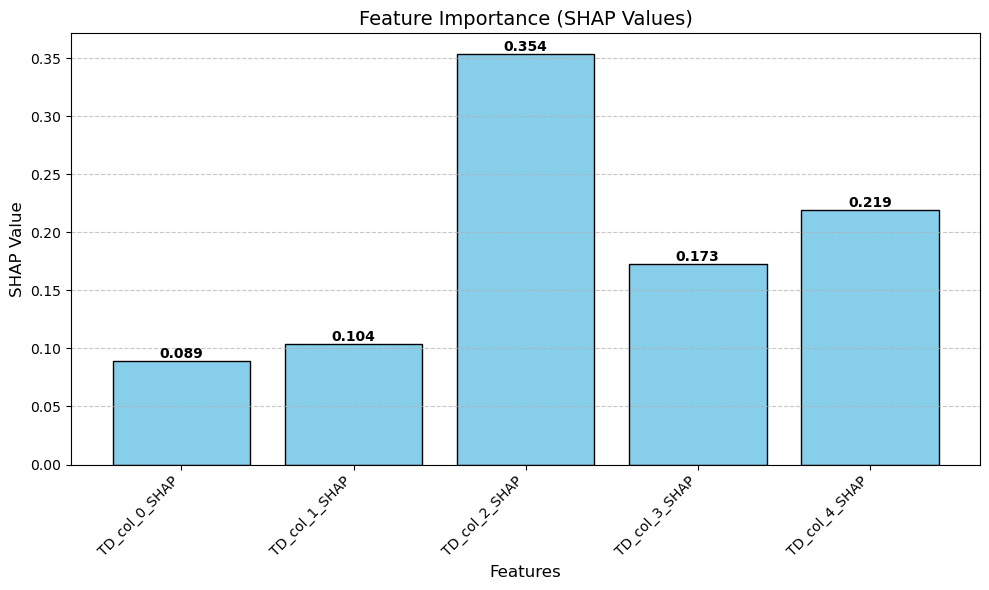


Prediction : 
    id  Prediction  isFraud    prob_0    prob_1
0   82           0        0  0.986055  0.013945
1  172           0        0  0.992571  0.007429
2  305           0        0  0.993359  0.006641
3  174           0        0  0.988657  0.011343
4  156           0        0  0.989785  0.010215
5  273           0        0  0.992731  0.007269
6  351           0        0  0.990989  0.009011
7  179           0        0  0.992468  0.007532
8  293           0        0  0.993427  0.006573
9  124           0        0  0.993332  0.006668

ROC-AUC : 


AUC,GINI
0.9205832372758491,0.8411664745516982


threshold_value,tpr,fpr
0.04081632653061224,0.8372093023255814,0.08431272355646398
0.08163265306122448,0.6511627906976745,0.04649974450689831
0.1020408163265306,0.627906976744186,0.032192130812468064
0.12244897959183673,0.5581395348837209,0.027593254982115484
0.16326530612244897,0.5116279069767442,0.021972406745017884
0.18367346938775508,0.5116279069767442,0.01992846193152785
0.14285714285714285,0.5116279069767442,0.021972406745017884
0.061224489795918366,0.7674418604651163,0.05518650996423097
0.02040816326530612,0.9069767441860465,0.13336739908022482
0.0,1.0,1.0



Confusion Matrix : 


array([[1954,    3],
       [  37,    6]], dtype=int64)

In [21]:
prediction = fd2.predict(fraud_df_test)

In [22]:
prediction.head()

id,Prediction,isFraud,prob_0,prob_1
6,0,0,0.9933320141432361,0.006667985856763832
8,0,0,0.9715231138276925,0.028476886172307387
9,0,0,0.9931099439447763,0.006890056055223692
10,0,0,0.9933320141432361,0.006667985856763832
12,0,0,0.9932777697705756,0.006722230229424547
13,0,0,0.9897398685237714,0.010260131476228665
11,0,0,0.993701292503714,0.0062987074962859504
7,0,0,0.9754107014992531,0.024589298500746763
5,0,0,0.993894601770324,0.00610539822967598
4,0,0,0.9919517607931936,0.008048239206806423


In [23]:
performance_metrics = fd2.evaluate(fraud_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_2 
Feature Selection Method : pca

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     1954       37   0.981416  0.998467  0.989868     1957
1               1  CLASS_2        3        6   0.666667  0.139535  0.230769       43
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.980000
1       5     Macro-Precision     0.824042
2       6        Macro-Recall     0.569001
3       7            Macro-F1     0.610319
4       9     Weighted-Recall     0.980000
5      10         Weighted-F1     0.973548
6       8  Weighted-Precision     0.974649
7       4            Micro-F1     0.980000
8   

In [24]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,1954,37,0.9814163736815671,0.9984670413898825,0.9898682877406281,1957
1,1,CLASS_2,3,6,0.6666666666666666,0.13953488372093023,0.23076923076923078,43



Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_1 
Feature Selection Method : rfe

Applying SHAP for Model Interpretation...

SHAP Analysis Completed. Feature Importance Available.


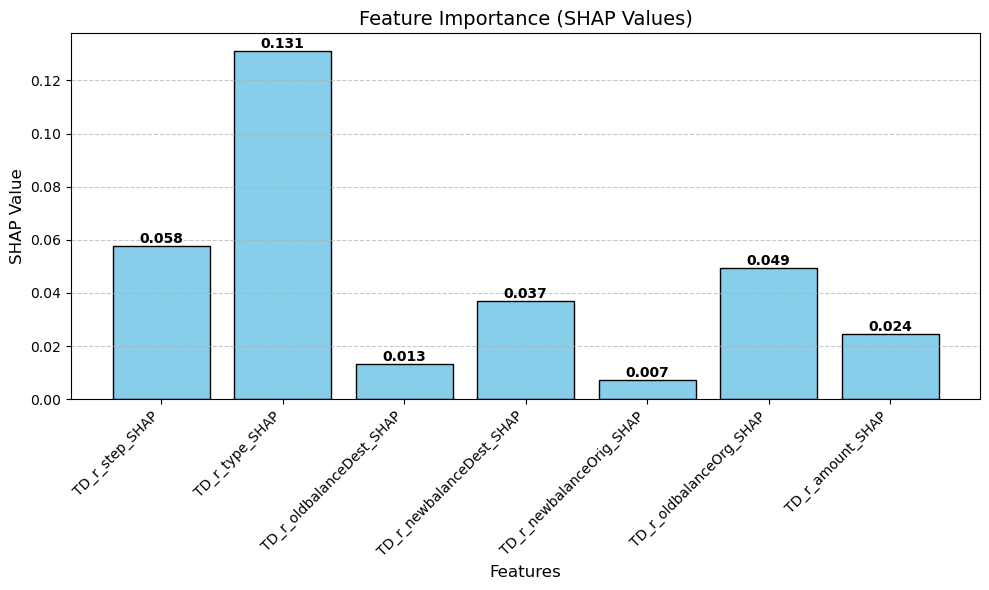


Prediction : 
    id  prediction  prob_1  prob_0  isFraud
0  156           0     0.0     1.0        0
1  305           0     0.0     1.0        0
2  273           0     0.0     1.0        0
3   82           0     0.0     1.0        0
4  198           0     0.0     1.0        0
5  179           0     0.0     1.0        0
6  351           0     0.0     1.0        0
7  187           0     0.0     1.0        0
8  174           0     0.0     1.0        0
9  293           0     0.0     1.0        0

ROC-AUC : 


AUC,GINI
0.8974819075233806,0.7949638150467613


threshold_value,tpr,fpr
0.04081632653061224,0.8372093023255814,0.022994379151762903
0.08163265306122448,0.8372093023255814,0.022994379151762903
0.1020408163265306,0.8372093023255814,0.022994379151762903
0.12244897959183673,0.8372093023255814,0.022994379151762903
0.16326530612244897,0.8372093023255814,0.022994379151762903
0.18367346938775508,0.8372093023255814,0.022994379151762903
0.14285714285714285,0.8372093023255814,0.022994379151762903
0.061224489795918366,0.8372093023255814,0.022994379151762903
0.02040816326530612,0.8372093023255814,0.022994379151762903
0.0,1.0,1.0



Confusion Matrix : 


array([[1912,   45],
       [   7,   36]], dtype=int64)

In [25]:
prediction2 = fd2.predict(fraud_df_test, rank=9)

In [26]:
performance_metrics2 = fd2.evaluate(fraud_df_test, rank=9)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_1 
Feature Selection Method : rfe

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     1912        7   0.996352  0.977006  0.986584     1957
1               1  CLASS_2       45       36   0.444444  0.837209  0.580645       43
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.974000
1       5     Macro-Precision     0.720398
2       6        Macro-Recall     0.907107
3       7            Macro-F1     0.783615
4       9     Weighted-Recall     0.974000
5      10         Weighted-F1     0.977856
6       8  Weighted-Precision     0.984486
7       4            Micro-F1     0.9740

In [27]:
fd2.deploy(table_name='top_10_models', top_n=10)

Model Deployment Completed Successfully.


In [28]:
fd2.deploy(table_name='mixed_models', ranks=[2,5,6,9])

Model Deployment Completed Successfully.


In [29]:
fd2.deploy(table_name='range_models', ranks=range(5,8))

Model Deployment Completed Successfully.


In [30]:
remove_context()

True